## Observations and Insights 

Observations:
1. Bar charts show that Capomulin was the most used drug in the trials.
2. Tumor volumes are low for mice who use Capomulin, Ramicane and high for mice who used Infubinol, Ceftamin.
3. There is a strong positive correlation between mouse weight and tumor size when using Capomulin regimen

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
total_mice = combined_data_df['Mouse ID'].nunique()

total_mice_dict = {"Number of Mice": [total_mice]}

total_mice_df = pd.DataFrame(total_mice_dict)
total_mice_df

,Number of Mice
0,249


In [3]:
dup_mice = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
check_g989 = combined_data_df[combined_data_df["Mouse ID"] == 'g989'] 

check_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
clean_combined_df = combined_data_df[combined_data_df["Mouse ID"].isin(dup_mice) == False]
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
total_mice_final = clean_combined_df['Mouse ID'].nunique()
total_mice_final_dict = {"Number of Mice": [total_mice_final]}
total_mice_final_df = pd.DataFrame(total_mice_final_dict)
total_mice_final_df

,Number of Mice
0,248


## Summary Statistics

In [7]:
summ_stats = clean_combined_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean = summ_stats.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = summ_stats.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = summ_stats.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd = summ_stats.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = summ_stats.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

stat_analysis_df = pd.DataFrame({
                                "Mean":mean,
                                "Median":median,
                                "Variance":variance, 
                                "Std. Dev.": sd, 
                                "SEM": sem
                                })

stat_analysis_df = stat_analysis_df.round(2)
stat_analysis_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

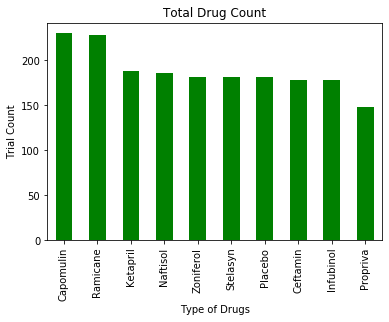

In [37]:
drug_ct = clean_combined_df["Drug Regimen"].value_counts()
y_axis = drug_ct.values
x_axis = drug_ct.index

drug_ct.plot(kind="bar", 
             facecolor='green'
            )

plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()

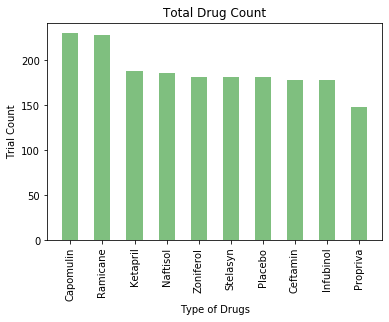

In [38]:
drug_ct = clean_combined_df["Drug Regimen"].value_counts()

y_axis = drug_ct.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = drug_ct.index
                 
plt.bar(x_drugs, 
        y_axis, 
        color = 'g', 
        alpha = 0.5, 
        align = "center", 
        width = .5
       )

plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)

plt.show()

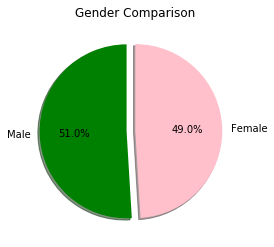

In [82]:
gender_ct = clean_combined_df["Sex"].value_counts()

labels = gender_ct.values
sizes = gender_ct.values

colors = ["green", "pink"]

explode = [0.1,0]

gender_ct.plot(kind = "pie", 
              explode = explode, 
              colors = colors, 
              autopct = "%1.1f%%", 
              shadow = True, 
              startangle = 90
             )

plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()

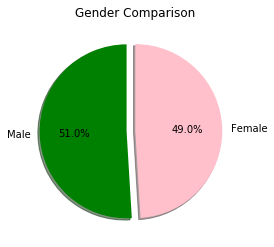

In [83]:
gender_ct = clean_combined_df["Sex"].value_counts()

labels = gender_ct.index

sizes = gender_ct.values

colors = ["green", "pink"]

explode = [0.1,0]

plt.pie(sizes, 
        explode = explode, 
        labels = labels, 
        colors = colors, 
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=90
       )

plt.title("Gender Comparison")
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
max_tumor=clean_combined_df.groupby("Mouse ID").max().reset_index()
max_tumor

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_combined_df, on=["Mouse ID","Timepoint"], how='left')
merge_data.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [63]:
# QUARTILES
    #Capomulin
quartile_cap = capomulin.quantile([.25,.5,.75])
LB_cap = quartile_cap[.25]
UB_cap = quartile_cap[.75]
IQR_cap = UB_cap - LB_cap

    #Ramicane 
quartile_ram = ramicane.quantile([.25,.5,.75])
LB_ram = quartile_ram[.25]
UB_ram = quartile_ram[.75]
IQR_ram = UB_ram - LB_ram

    #Infubionol 
quartile_inf = infubinol.quantile([.25,.5,.75])
LB_inf = quartile_inf[.25]
UB_inf = quartile_inf[.75]
IQR_inf = UB_inf - LB_inf

    #Ceftmain 
quartile_cef = ceftamin.quantile([.25,.5,.75])
LB_cef = quartile_cef[.25]
UB_cef = quartile_cef[.75]
IQR_cef = UB_cef - LB_cef

#OUTLIERS

    #Capomulin 
LB_outlier_cap = LB_cap - (1.5 * IQR_cap)
UB_outlier_cap = UB_cap + (1.5 * IQR_cap)

    #Ramicane 
LB_outlier_ram = LB_ram - (1.5 * IQR_ram)
UB_outlier_ram = UB_ram + (1.5 * IQR_ram)

    #Infubionol 
LB_outlier_inf = LB_inf - (1.5 * IQR_inf)
UB_outlier_inf = UB_inf + (1.5 * IQR_inf)

    #Ceftmain 
LB_outlier_cef = LB_cef - (1.5 * IQR_cef)
UB_outlier_cef = UB_cef + (1.5 * IQR_cef)

print(f"Capomulin LB: {round(LB_outlier_cap, 2)}")
print(f"Capomulin UB: {round(UB_outlier_cap, 2)}")
print(f"Ramicane LB: {round(LB_outlier_ram, 2)}")
print(f"Ramicane UB: {round(UB_outlier_ram, 2)}")
print(f"Infubionol LB: {round(LB_outlier_inf, 2)}")
print(f"Infubionol UB: {round(UB_outlier_inf, 2)}")
print(f"Ceftmain LB: {round(LB_outlier_cef, 2)}")
print(f"Ceftmain UB: {round(UB_outlier_cef, 2)}")

Capomulin LB: 20.7
Capomulin UB: 51.83
Ramicane LB: 31.56
Ramicane UB: 40.66
Infubionol LB: 36.83
Infubionol UB: 82.74
Ceftmain LB: 25.36
Ceftmain UB: 87.67


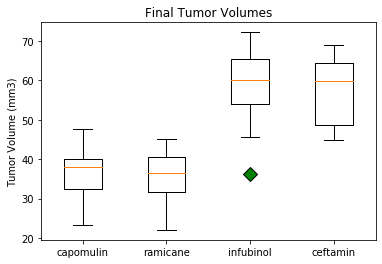

In [84]:
green_diamond = dict(markerfacecolor = 'g', marker = 'D', markersize = 10)

plt.boxplot([capomulin,ramicane, infubinol, ceftamin], 
            labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"], 
            flierprops =  green_diamond)

plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [73]:
capomulin_table = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin']
capomulin_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


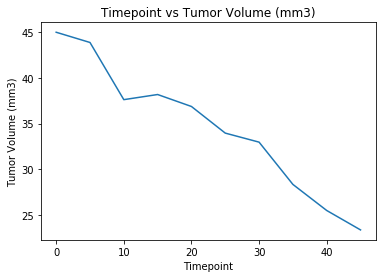

In [85]:
cap_table = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin']
mouse = clean_combined_df.loc[clean_combined_df['Mouse ID'] == 's185']

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

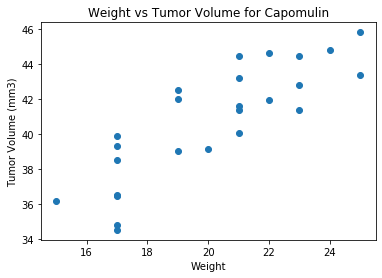

In [78]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_wgt = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin']
cap_avg = cap_wgt.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show() 

## Correlation and Regression

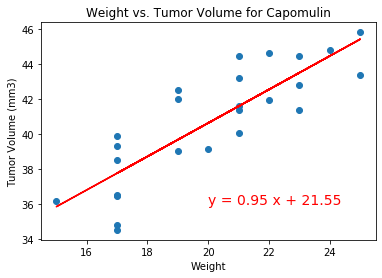

In [24]:
(slope, intercept,rvalue, pvalue, stderr) = linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values = cap_avg["Weight (g)"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color = 'red')
plt.annotate(line_eq,(20,36), color = 'r', fontsize = 14)
plt.title("Weight vs. Tumor Volume for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [88]:
print(f"Correlation: {round(rvalue,2)}") 

Correlation: 0.84
